<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/machine%20learning%20%26%20deep%20learning/HG_06_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6 비지도 학습**
============================

6-1. 군집 알고리즘
==================
> 흑백 사진을 분류하면서 비지도 학습과 군집 알고리즘에 대해 학습

> ### 타깃을 모르는 비지도 학습
> * 타깃이 없는 과일 사진을 종류별로 분류하는 것과 같은 알고리즘을 **비지도학습**이라고 한다. 

In [1]:
# 데이터 준비하기
!wget https://bit.ly/fruits_300_data  -O fruits_300.npy

--2022-10-24 10:17:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-24 10:17:09--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-24 10:17:09--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [3]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


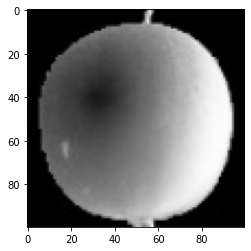

In [4]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

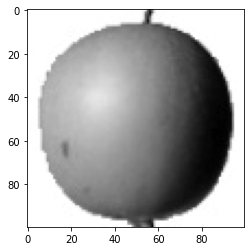

In [5]:
# 색상 반전
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

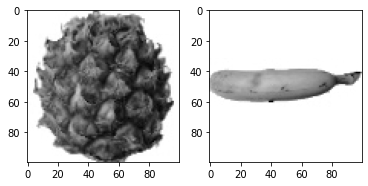

In [6]:
# 사과이외에 바나나, 파인애플 이미지 확인
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [7]:
# 2차원 배열을 쭉 늘여뜨려 1차원 배열로 전환 
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


In [8]:
# 각 샘플에 대한 픽셀 평균값
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


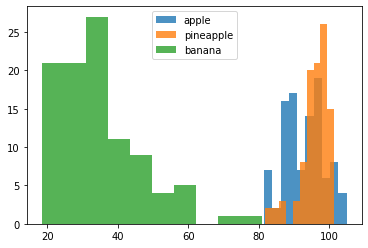

In [9]:
# alpha는 투명도, legend는 범례
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

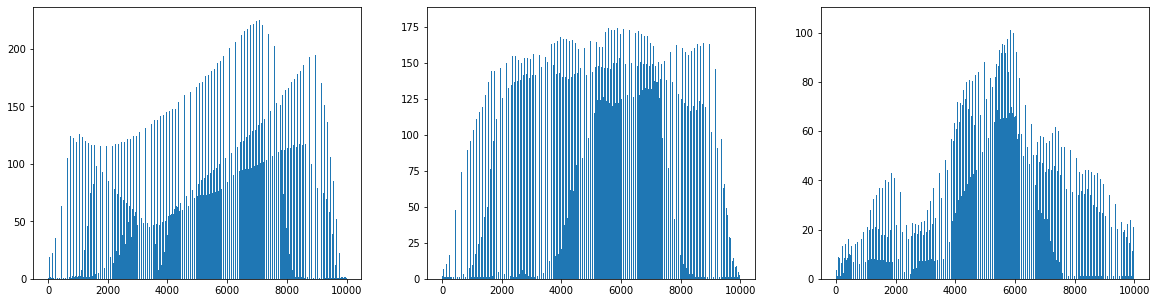

In [10]:
# 픽셀 10000개에 대한 평균값을 막대그래프로 표현
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

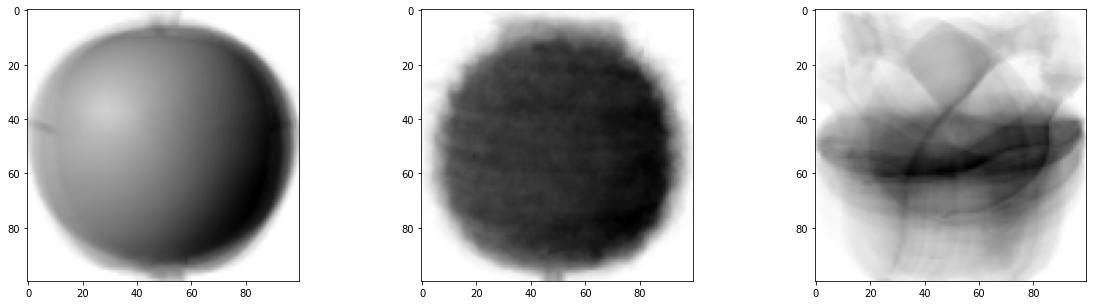

In [11]:
# 픽셀 평균값을 이미지로 출력
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

> ### 평균값과 가까운 사진 고르기
> * 절댓값 오차 (mean absolute error, MAE) 활용

In [12]:
# 샘플의 절대값, 평균 계산
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300,)


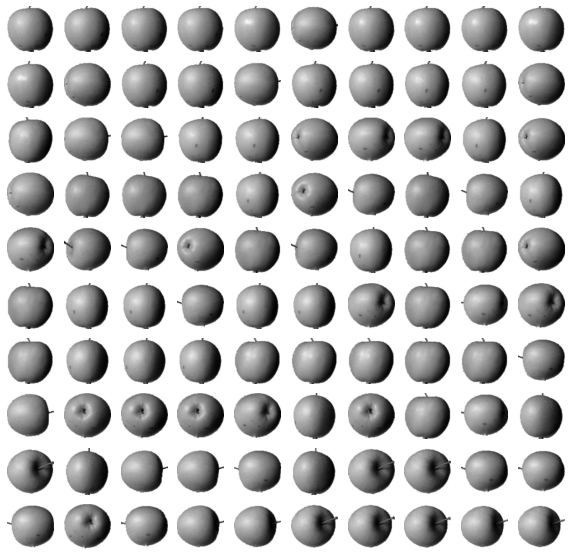

In [13]:
# 평균값과 오차가 작은 순서대로 샘플 100개 선정
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

6-2. k-means
==================
> k-means 알고리즘의 작동방식 이해와 과일사진을 자동으로 모으는 비지도학습 모델 생성

> ### k-means 알고리즘
> 1) 무작위로 k개의 클러스터 중심을 정한다
> 2) 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
> 3) 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
> 4) 클러스터 중심에 변화가 없을때까지 2번으로 돌아가 반복

In [14]:
!wget https://bit.ly/fruits_300_data -O fruits_300_2.npy
fruits = np.load('fruits_300_2.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-10-24 10:18:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-24 10:18:15--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-24 10:18:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [15]:
from sklearn.cluster import KMeans
# 클러스터 개수를 3개로 미리 지정
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [16]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [17]:
# 각 레이블의 개수
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [18]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

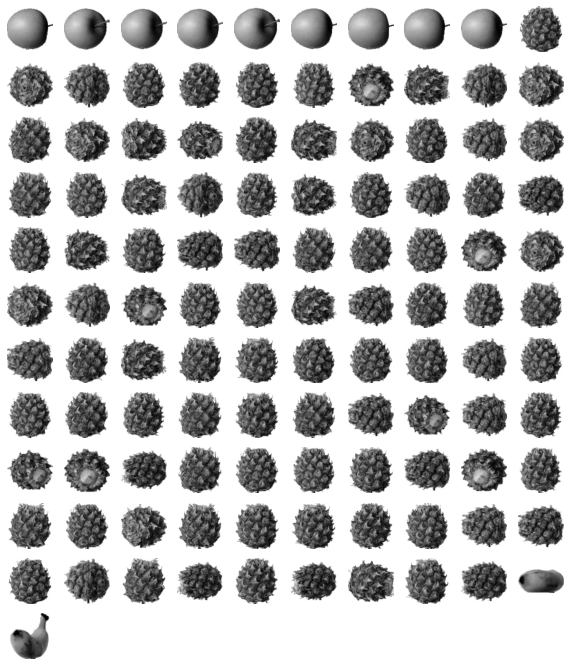

In [19]:
draw_fruits(fruits[km.labels_==0])

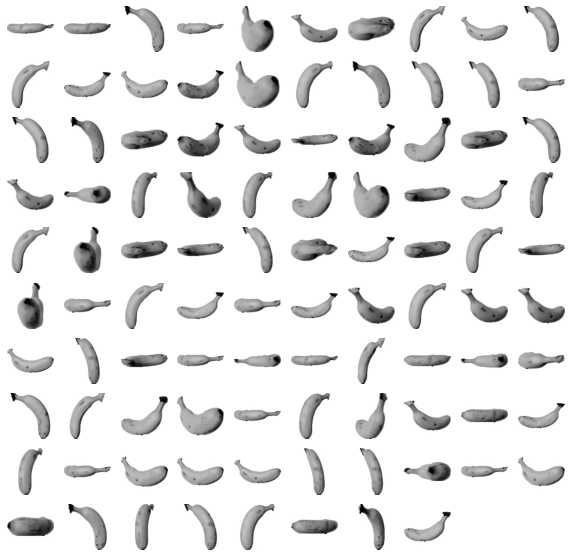

In [20]:
draw_fruits(fruits[km.labels_==1])

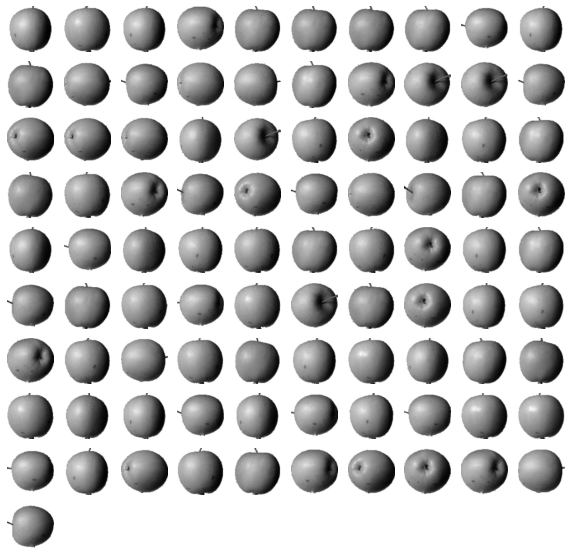

In [21]:
draw_fruits(fruits[km.labels_==2])

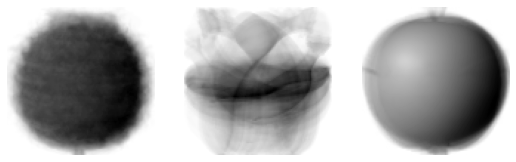

In [22]:
# 클러스터 중심 이미지 츨력
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [23]:
# 인덱스가 100인 샘플에서 각 클러스터 중심까지 거리로 변환
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [24]:
# 인덱스가 100인 샘플의 예측 레이블 확인
print(km.predict(fruits_2d[100:101]))

[0]


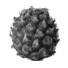

In [25]:
draw_fruits(fruits[100:101])

In [26]:
# k-means 알고리즘의 반복횟수
print(km.n_iter_)

4


> ### 최적의 클러스터 개수 찾기
> * 적절한 클러스터의 개수를 찾기 위해 **엘보우**방법을 사용할 수 있다 
> * 엘보우 방법은 **이니셔**의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법이다 
> * **이니셔**는 클러스터 중심과 클러스터에 속한 샘플사이의 거리의 제곱 합이다 

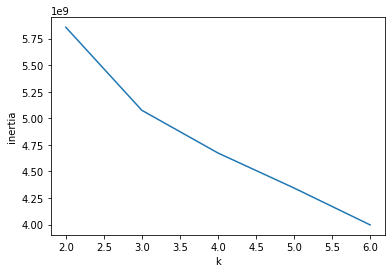

In [29]:
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

6-3. 주성분 분석
=============================
차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델 실습

> ### 차원과 차원 축소 
> * 대표적인 차원 축소 알고리즘인 **주성분 분석**(principle component analysis) 실습
> * 주성분 분석은 다차원 데이터의 정보를 최대한 유지하며, 저차원으로 차원을 축소하는 다변량 데이터 분석 기법
> * 주성분 분석은 데이터의 분산이 큰 뱡향을 찾는 것이 목적 

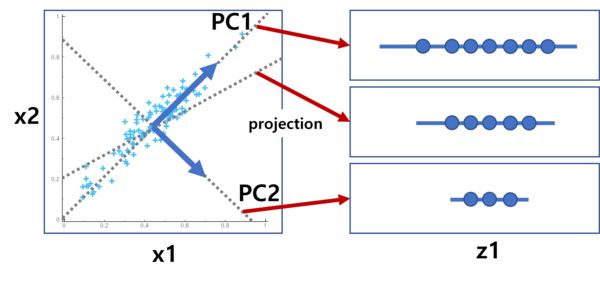

출처 : http://www.sbr.ai/news/articleView.html?idxno=1513

In [30]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-10-24 11:15:11--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-24 11:15:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-24 11:15:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connect

In [31]:
from sklearn.decomposition import PCA
# 주성분의 개수 지정
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [32]:
# 배열의 크기 확인
# 결과값 첫번째는 입력한 주성분의 개수, 두번째는 원본데이터의 특성 개수
print(pca.components_.shape)

(50, 10000)


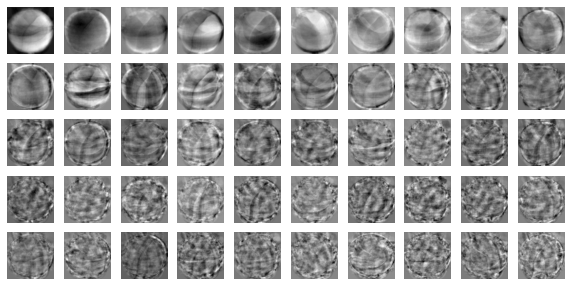

In [33]:
# 각 주성분을 100*100 크기의 이미지로 출력
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [34]:
# 원본데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄이기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


> * 데이터의 크기를 1/200으로 줄였으며, fruits_2d 대신 fruits_pca를 저장하면 공간을 줄일 수 있다
> * 데이터의 차원을 줄였다면 다시 원상복구하는 것도 가능할까?

> ### 원본 데이터 재구성
> * 특성을 줄였기 때문에 원본 데이터에 어느정도 손실이 발생하였다
> * 하지만 분산이 큰 방향으로 데이터르 투영했기 때문에, 원본 데이터를 상당부분 재구성 할 수 있다

In [36]:
# inverse_transform() 매서드 사용
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


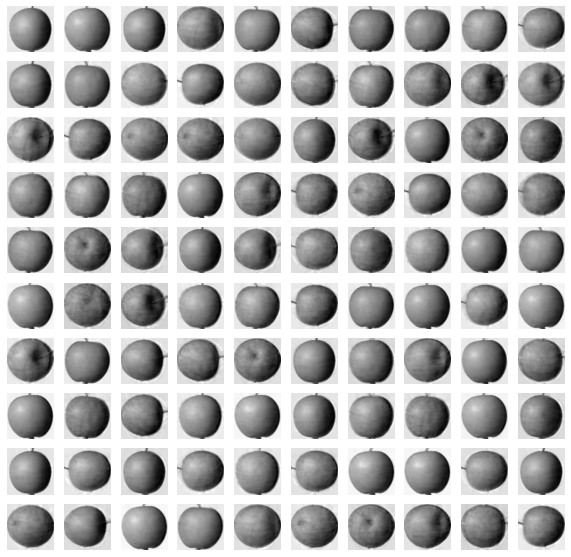

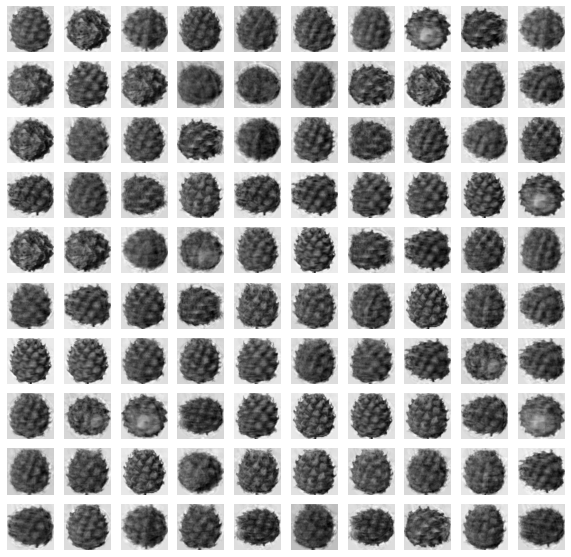

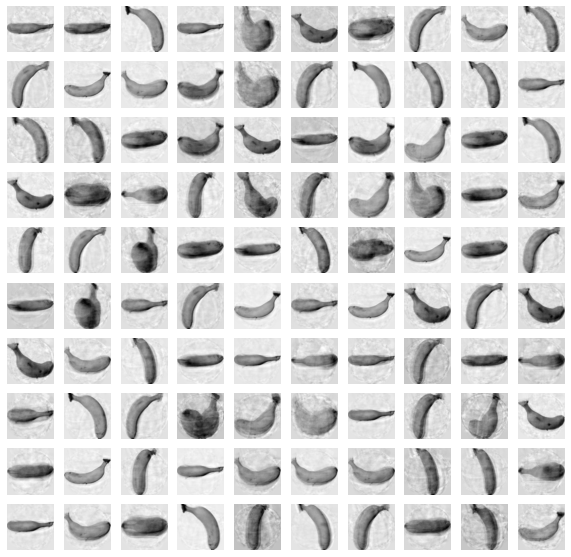

In [37]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

> ### 설명된 분산
> 주성분이 얼마나 분산을 잘 보존하고 있는지, 분산을 잘 나타내는지 기록한 값을 **설명된 분산**이라고 한다. 

In [38]:
# 총 분산 비율 값
print(np.sum(pca.explained_variance_ratio_))

0.9215134962118006


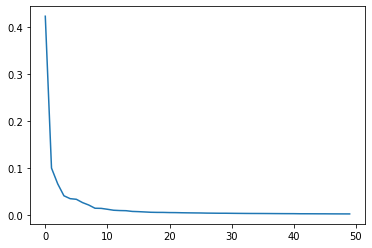

In [39]:
# 설명된 분산의 비율을 그래프로 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현하고 있다

> ### 다른 알고리즘과 함께 사용하기
> * 과일 사진 원본데이터와 PCA로 축소한 데이터를 지도학습에 적용해보고 어떤 차이가 있는지 확인

In [40]:
# 과일 사진을 분류하기 위해 로지스틱 회귀 모델 사용 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
# 타깃값 지정, 사과 0, 파인애플 1, 바나나 2
target = np.array([0]*100 + [1]*100 + [2]*100)

In [42]:
# 원본 데이터 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3053356647491454


In [43]:
# 차원을 축소한 데이터 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.055579090118408205


In [44]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 생성
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [45]:
# 찾은 주성분의 개수 확인
print(pca.n_components_)

2


In [46]:
# 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [47]:
# 2개의 특성을 사용한 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.99
0.07862439155578613


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
# 차원 축소된 데이터를 사용해 k-means 알고리즘으로 클러스터 확인
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


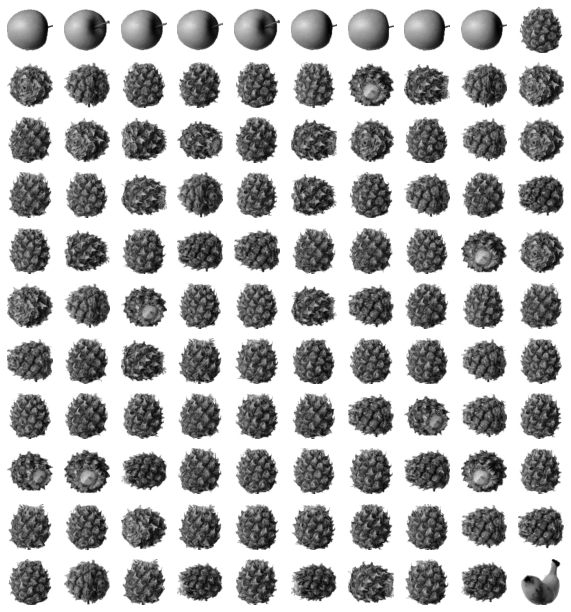

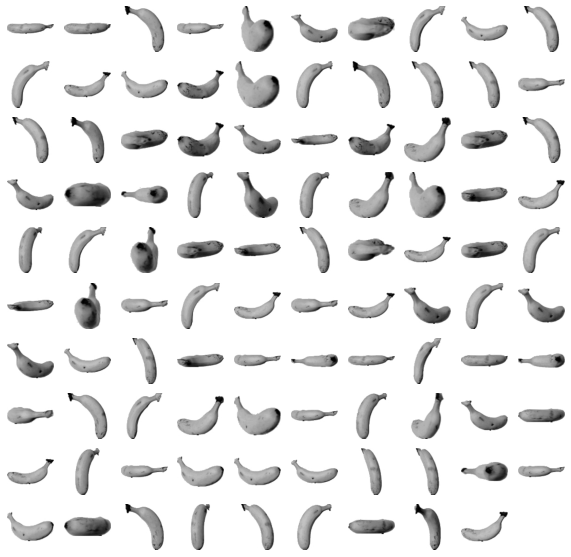

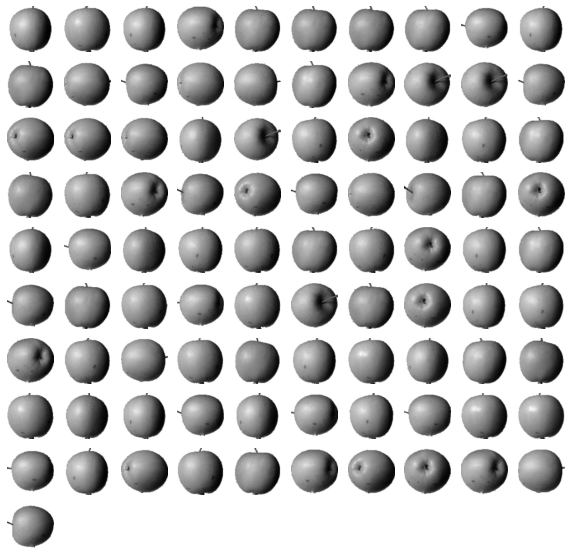

In [51]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

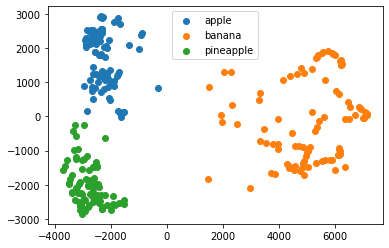

In [52]:
# 차원을 줄인 데이터는 2차원이기 때문에 산점도로 표현이 가능
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()